## ***Train Data set 구축 및 전처리***

In [2]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFSq6ZgdzEui42a_XUkDlsPBKgNkGSb3YynEyy98unsc3FAmnotrWk
Mounted at ./gdrive


In [5]:
cd skk_CS231_study/

/content/gdrive/My Drive/skk_CS231_study


In [ ]:
import cv2
import matplotlib.pyplot as plt


def detect_num(contours):
    # print(len(contours))
    box=[]
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        x,y,w,h = cv2.boundingRect(cnt)
        rect_area = w*h
        aspect_ratio = float(w)/h
        if rect_area>=600 and rect_area<=900:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
            rect_coord = (cv2.boundingRect(cnt))
            if box and box[-1][0] == rect_coord[0]:
                continue
            else:
                box.append(rect_coord)
    box = sorted(box)
    print(box)
    return box

params = list(net.parameters())
print(params[0].size())

torch.Size([6, 3, 3, 3])


In [ ]:
x = [28,50,73,109,131,152,172]
y = 32
cnt =0
lamb_check_coord = lambda x, coord : x<coord[0]+coord[2] and x>coord[0] and 32<coord[1]+coord[3] and 32>coord[1] and coord[3]>coord[2]
def save_coord_respectively(coordbox,img,num_name,str_name):
    print("save_coord_respectively")
    global x,y,cnt
    name=""
    for coord in (coordbox):
        for j in range(len(x)):
            if lamb_check_coord(x[j],coord):
                if (num_name[j]!=-1):
                    name = str(num_name[j])
                else:
                    name = str_name
                try:
                    name = name+'_'+datetime.datetime.now().strftime("%y%m%d_%H%M%S")
                    while (name+'.jpg' in os.listdir('.//train__//')):
                        name +='_'
                    cv2.imwrite('.//train__//'+ name+'.jpg',img[coord[1]:coord[1]+coord[3],coord[0]:coord[0]+coord[2]])
                    print(cnt)
                    cnt+=1
                except:
                    "error"

628
[(64, 18, 19, 35), (101, 14, 17, 43), (125, 15, 15, 42)]
save_coord_respectively
sfd


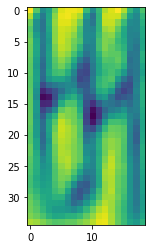

sfd


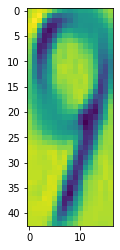

sfd


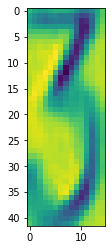

In [ ]:
import cv2
import copy
import os
import matplotlib.pyplot as plt
import datetime
path = "./PerspectiveImages_cleaning"
pps = os.listdir("./PerspectiveImages_cleaning")
file_cnt=0
print(len(pps))
contours_arr = []

for n in (pps):
    path_=os.path.join(path,n)
    s = path_.split("/")[2].split('.')[0]
    if len(s)!=8:continue
    num_name=[]
    str_name=''
    for i in range(len(s)):
        if(s[i]<='9' and s[i]>='0'):
            num_name.append(s[i])
        else:
            str_name+=s[i]
    num_name.insert(2,-1)
    img = cv2.imread(path_,0)
    img_origin = copy.deepcopy(img)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY, 201, 2)
    blur = cv2.GaussianBlur(img,(3,3),0)
    canny = cv2.Canny(blur,0,250)
    contours, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    box = detect_num(contours)

    name_cnt =0
    save_coord_respectively(box,img_origin, num_name,str_name)
    file_cnt+=1
    break

## ***val 데이터 셋 구축***

In [ ]:
import os
import matplotlib.pyplot as plt
CROP_DATA = [(15, 5, 25, 55), (38, 5, 25, 55), (60, 10, 25, 45),(60, 10, 25, 45), (95, 10, 25, 50), (115, 10, 28, 50), (140, 5, 25, 52), (160, 7, 22, 50)]

path = './val__/'
file_list = os.listdir(path)
# print(file_list)
for i in range(len(file_list)):
    # if i!=1 :continue
    file_name = path+file_list[i]
    if '.jpg' not in file_name:
        continue
    img = cv2.imread(file_name)
    for IND in range(8):
        char_file = file_list[i][IND]
        if(char_file >='6') :continue
        print (file_list[i])
        _ = '_'
        if IND==2 or IND==3 :
            # print(IND)
            continue
        while (char_file+_+file_list[i] in os.listdir('./val__/'+char_file)):
            _ +='_'
        cv2.imwrite('./val__//'+char_file+'//'+char_file+_+file_list[i],img[CROP_DATA[IND][1]:CROP_DATA[IND][1]+CROP_DATA[IND][3],
                CROP_DATA[IND][0]:CROP_DATA[IND][0]+CROP_DATA[IND][2]
                ])

## ***Data Loader(train,validation) & Building Datasets***


In [10]:
from torchvision import transforms
import torchvision
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from PIL import Image

def gaussian_blur(img, sigma):
    gaussian_filter(img[:,:,0], output=img[:,:,0], sigma=sigma)
    gaussian_filter(img[:,:,1], output=img[:,:,1], sigma=sigma)
    gaussian_filter(img[:,:,2], output=img[:,:,2], sigma=sigma)

def data_augment(img):
    img = np.array(img)
    if np.random.random() < .5:
        sig = np.random.uniform(0.0, 3.0)
        gaussian_blur(img, sig)

    return Image.fromarray(img)

train_aug = transforms.Compose([
    transforms.Lambda(lambda img: data_augment(img)),##undefitting시 주석할 것
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.10), ratio=(0.3, 3.3), value=0, inplace=True),
])
val_aug = transforms.Compose([
    # transforms.Lambda(lambda img: data_augment(img)),##undefitting시 주석할 것
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    # transforms.RandomErasing(p=0.1, scale=(0.02, 0.10), ratio=(0.3, 3.3), value=0, inplace=True),
])
trainset = torchvision.datasets.ImageFolder(root = './train__',
                                           transform = train_aug)
valset = torchvision.datasets.ImageFolder(root = './val__',transform= val_aug)

Train / Validation Loader 구축 및 DataSet생성

In [40]:
from torch.utils.data import Dataset, DataLoader
trainloader = DataLoader(trainset,batch_size=29,shuffle=True,num_workers=4)
valloader = DataLoader(valset,batch_size=29,shuffle=True,num_workers=4)


Model

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()
#         # 1 input image channel, 6 output channels, 3x3 square convolution
#         # kernel
#         self.conv1 = nn.Conv2d(3, 6, 3)
#         self.conv2 = nn.Conv2d(6, 16, 3)
#         # an affine operation: y = Wx + b
#         self.fc1 = nn.Linear(16 * 6 * 6, 128)  # 6*6 from image dimension
#         self.fc2 = nn.Linear(128, 256)
#         # self.bn1 = nn.BatchNorm2d(84)
#         self.fc3 = nn.Linear(256, 128)
#         self.fc4 = nn.Linear(128, 10)

#     def forward(self, x):
#         # Max pooling over a (2, 2) window
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
#         # If the size is a square you can only specify a single number
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x = x.view(-1, self.num_flat_features(x))
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))

#         # y = F.softmax(self.fc4(x), dim=1)
#         return x

#     def num_flat_features(self, x):
#         size = x.size()[1:]  # all dimensions except the batch dimension
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features


class CNNClassifier(nn.Module):
    
    def __init__(self):
        # 항상 torch.nn.Module을 상속받고 시작
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3,10,3)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10,20,3)
        self.pool2 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(20*6* 6,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool2(F.relu(self.conv2(x)))
        # print(x.shape)
        
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = CNNClassifier().cuda()
print(net)


CNNClassifier(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=720, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [42]:
import torch.optim as optim
import cv2
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().cuda()

train Model

In [ ]:
nb_epochs = 2000
net.train()
for epoch in range(nb_epochs+1):
    total,correct=0,0
    
    for idx, (x_train, y_train) in enumerate(trainloader):
        x_train,y_train = x_train.cuda(),y_train.cuda()
        prediction = net(x_train)
        loss = criterion(prediction, y_train)
        _, predicted = torch.max(prediction.data, 1)
        total += y_train.size(0)
        correct += (predicted == y_train).sum().item()
        # init gradient 0
        optimizer.zero_grad()
        loss.backward()
        # W b Update
        optimizer.step()
        if idx%50==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, idx * len(x_train), len(trainloader.dataset),100. * idx / len(trainloader), loss.item()))
            print("accuracy = {}".format(correct*100/total))


Model test

In [44]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net.eval()
with torch.no_grad():
    for data in valloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        # print(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1) # prediction
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (str(i), 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 32 %
Accuracy of     1 :  0 %
Accuracy of     2 : 39 %
Accuracy of     3 : 17 %
Accuracy of     4 :  0 %
Accuracy of     5 : 22 %
Accuracy of     6 :  0 %
Accuracy of     7 : 96 %
Accuracy of     8 : 27 %
Accuracy of     9 : 62 %
